Get It Done:
+ **figure out how to pull replies for one tweet**
+ pull a dataframe of replies to all FTM tweets in last 7 days
+ use NLP (bag of words or word2vec) for feature engineering
    + pull words
    + create bag of words
    + get count for bag of words
    + insert column of views
    + insert column of total fanbase
+ test out machine learning algorithms to find the one that is most predictive and/or explanatory (test/training set?)
+ pull dataframe of highly-viewed and low-viewed tweets from non-FTM sources
+ go through above steps to correlate words with views
+ figure out how to get code/model/data onto a website that jared can use

### import libraries
### twitter api credentials

In [2]:
import pandas as pd
import numpy as np
import tweepy
import twitter
import time


In [68]:
consumer_key = "gLUMKRUMrvDmu2m1XEzGq1t4e"
consumer_secret = "1N6idr96sfW1fIPYJmgcFQlWks4ZsjsvcEDbTx6S1k2qTsnlVI"
access_token = "1090700974740500480-02NLG7LJYtBL5HkAbNbwAlZaVqjeSl"
access_token_secret = "qPGV3GAvtSgHlIuPu8tdrqxWyRfG0JWcThg9y6qW6TjCs"

### credentials/authorization for tweepy (standard API)

In [69]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

### loading FTM dataframe

In [80]:
FTM_df = pd.read_excel("FTMTweets3.xlsx")

In [81]:
FTM_df.head(10)

,ID,Network,URL,Account,Type,Views,Shares,Likes,Dislikes,Comments,Post date,Track date,Last updated,Post caption,Thumbnail,Event tag,Partner tag,Creator tag,Filetype tag
0,2008,Twitter,/NikolaVucevic/status/1098235335132303362,NikolaVucevic,NaN,0,10,193,0,8,2019-02-20 14:58:02.004,2019-02-20 17:11:24.000,2019-02-21 01:06:36.000,🔥🔥🔥🔥 @nikebasketball https://t.co/CTgFISbgDy,NaN,NaN,NaN,NaN,NaN
1,1994,Instagram,/p/BuDEa2snJ8V/,marcelashoward,GIF,0,0,6889,0,11,2019-02-19 03:16:43.000,2019-02-20 02:00:22.003,2019-02-21 01:19:39.000,@NBA All Star Weekend Was One For The Books! T...,908d4b4efd.jpg,NaN,NaN,NaN,NaN
2,1892,Twitter,/NBAKicks/status/1097544211656790017,NBAKicks,Video,2277,10,87,0,3,2019-02-18 17:11:45.997,2019-02-18 20:17:40.004,2019-02-21 01:28:33.997,🏀🌟👟\n\n@JoelEmbiid x #NBAAllStar x #NBAKicks h...,114993e089.jpg,NaN,NaN,NaN,NaN
3,1902,Instagram,/p/BuB_G0tBEGl/,nbakicks,Video,9995,0,3603,0,21,2019-02-18 17:11:18.004,2019-02-19 18:11:24.996,2019-02-21 01:18:43.004,@joelembiid x #NBAAllStar x #NBAKicks,dd79c23cf7.jpg,NaN,NaN,NaN,NaN
4,1903,Instagram,/p/BuB9pPtBT56/,nbakicks,Video,7033,0,2824,0,7,2019-02-18 16:58:42.997,2019-02-19 18:11:32.997,2019-02-21 01:17:45.004,#NikolaJokic x #NBAAllStar x #NBAKicks,a392e1ddb0.jpg,NaN,NaN,NaN,NaN
5,1891,Twitter,/nbakicks/status/1097537733155786753,nbakicks,Video,60777,164,1582,0,21,2019-02-18 16:46:01.001,2019-02-18 17:16:49.002,2019-02-21 01:00:08.004,🏀🌟👟\n\n@KDTrey5 x #NBAAllStar x #NBAKicks http...,56a2cee4b9.jpg,NaN,NaN,NaN,NaN
6,1904,Instagram,/p/BuB8Gy1hN_Q/,nbakicks,Video,9666,0,4283,0,19,2019-02-18 16:45:14.000,2019-02-19 18:11:38.000,2019-02-21 01:16:35.003,@easymoneysniper x #NBAAllStar x #NBAKicks,1e51e0e972.jpg,NaN,NaN,NaN,NaN
7,1905,Instagram,/p/BuB7Eb3Bhrn/,nbakicks,Video,7090,0,2674,0,4,2019-02-18 16:36:05.999,2019-02-19 18:11:43.996,2019-02-21 01:15:37.996,@k_mid22 x #NBAAllStar x #NBAKicks,99037b6b15.jpg,NaN,NaN,NaN,NaN
8,1896,Twitter,/NBAKicks/status/1097532955533160448,NBAKicks,Video,29546,95,916,0,7,2019-02-18 16:27:01.999,2019-02-18 20:18:25.001,2019-02-21 01:24:30.004,🏀🌟👟\n\n@stephencurry30 x #NBAAllStar x #NBAKic...,6f23431157.jpg,NaN,NaN,NaN,NaN
9,1906,Instagram,/p/BuB59bchGOl/,nbakicks,Video,7352,0,3557,0,9,2019-02-18 16:26:37.003,2019-02-19 18:11:50.001,2019-02-21 01:14:38.000,@stephencurry30 x #NBAAllStar x #NBAKicks,63d15dd9a7.jpg,NaN,NaN,NaN,NaN


In [82]:
FTM_df.shape

(160, 19)

In [83]:
FTM_df = FTM_df[FTM_df["Network"] == "Twitter"]

In [84]:
FTM_df.head()

,ID,Network,URL,Account,Type,Views,Shares,Likes,Dislikes,Comments,Post date,Track date,Last updated,Post caption,Thumbnail,Event tag,Partner tag,Creator tag,Filetype tag
0,2008,Twitter,/NikolaVucevic/status/1098235335132303362,NikolaVucevic,NaN,0,10,193,0,8,2019-02-20 14:58:02.004,2019-02-20 17:11:24.000,2019-02-21 01:06:36.000,🔥🔥🔥🔥 @nikebasketball https://t.co/CTgFISbgDy,NaN,NaN,NaN,NaN,NaN
2,1892,Twitter,/NBAKicks/status/1097544211656790017,NBAKicks,Video,2277,10,87,0,3,2019-02-18 17:11:45.997,2019-02-18 20:17:40.004,2019-02-21 01:28:33.997,🏀🌟👟\n\n@JoelEmbiid x #NBAAllStar x #NBAKicks h...,114993e089.jpg,NaN,NaN,NaN,NaN
5,1891,Twitter,/nbakicks/status/1097537733155786753,nbakicks,Video,60777,164,1582,0,21,2019-02-18 16:46:01.001,2019-02-18 17:16:49.002,2019-02-21 01:00:08.004,🏀🌟👟\n\n@KDTrey5 x #NBAAllStar x #NBAKicks http...,56a2cee4b9.jpg,NaN,NaN,NaN,NaN
8,1896,Twitter,/NBAKicks/status/1097532955533160448,NBAKicks,Video,29546,95,916,0,7,2019-02-18 16:27:01.999,2019-02-18 20:18:25.001,2019-02-21 01:24:30.004,🏀🌟👟\n\n@stephencurry30 x #NBAAllStar x #NBAKic...,6f23431157.jpg,NaN,NaN,NaN,NaN
11,1898,Twitter,/NBAKicks/status/1097527079569108992,NBAKicks,Video,4954,9,67,0,3,2019-02-18 16:03:40.997,2019-02-18 20:18:41.003,2019-02-21 01:22:30.003,🏀🌟👟\n\n@NikolaVucevic x #NBAAllStar x #NBAKick...,fe6ee111a6.jpg,NaN,NaN,NaN,NaN


In [85]:
FTM_df.shape

(54, 19)

In [86]:
def strip_ID(url):       
    return url[-19:]

In [87]:
FTM_df["Tweet_ID"] = FTM_df["URL"].apply(strip_ID)

In [88]:
FTM_df.head()

,ID,Network,URL,Account,Type,Views,Shares,Likes,Dislikes,Comments,Post date,Track date,Last updated,Post caption,Thumbnail,Event tag,Partner tag,Creator tag,Filetype tag,Tweet_ID
0,2008,Twitter,/NikolaVucevic/status/1098235335132303362,NikolaVucevic,NaN,0,10,193,0,8,2019-02-20 14:58:02.004,2019-02-20 17:11:24.000,2019-02-21 01:06:36.000,🔥🔥🔥🔥 @nikebasketball https://t.co/CTgFISbgDy,NaN,NaN,NaN,NaN,NaN,1098235335132303362
2,1892,Twitter,/NBAKicks/status/1097544211656790017,NBAKicks,Video,2277,10,87,0,3,2019-02-18 17:11:45.997,2019-02-18 20:17:40.004,2019-02-21 01:28:33.997,🏀🌟👟\n\n@JoelEmbiid x #NBAAllStar x #NBAKicks h...,114993e089.jpg,NaN,NaN,NaN,NaN,1097544211656790017
5,1891,Twitter,/nbakicks/status/1097537733155786753,nbakicks,Video,60777,164,1582,0,21,2019-02-18 16:46:01.001,2019-02-18 17:16:49.002,2019-02-21 01:00:08.004,🏀🌟👟\n\n@KDTrey5 x #NBAAllStar x #NBAKicks http...,56a2cee4b9.jpg,NaN,NaN,NaN,NaN,1097537733155786753
8,1896,Twitter,/NBAKicks/status/1097532955533160448,NBAKicks,Video,29546,95,916,0,7,2019-02-18 16:27:01.999,2019-02-18 20:18:25.001,2019-02-21 01:24:30.004,🏀🌟👟\n\n@stephencurry30 x #NBAAllStar x #NBAKic...,6f23431157.jpg,NaN,NaN,NaN,NaN,1097532955533160448
11,1898,Twitter,/NBAKicks/status/1097527079569108992,NBAKicks,Video,4954,9,67,0,3,2019-02-18 16:03:40.997,2019-02-18 20:18:41.003,2019-02-21 01:22:30.003,🏀🌟👟\n\n@NikolaVucevic x #NBAAllStar x #NBAKick...,fe6ee111a6.jpg,NaN,NaN,NaN,NaN,1097527079569108992


### Using Twitter API to Scrape Replies for Each Tweet

In [89]:
replies = []


for i in range(FTM_df.shape[0]):
    for tweet in tweepy.Cursor(api.search, q="to:" + FTM_df["Account"].iloc[i], since_id=FTM_df["Tweet_ID"].iloc[i], max_id=int(FTM_df["Tweet_ID"].iloc[i]) + 200000000000000, timeout=999999).items(2000):
        if tweet.in_reply_to_status_id_str == FTM_df["Tweet_ID"].iloc[i]:
            replies.append((tweet.text, tweet.in_reply_to_status_id_str))
    print("Processed Tweet ", i)
    time.sleep(900)
            

Processed Tweet  0
Processed Tweet  1
Processed Tweet  2
Processed Tweet  3
Processed Tweet  4
Processed Tweet  5
Processed Tweet  6
Processed Tweet  7
Processed Tweet  8
Processed Tweet  9
Processed Tweet  10
Processed Tweet  11
Processed Tweet  12
Processed Tweet  13
Processed Tweet  14
Processed Tweet  15
Processed Tweet  16
Processed Tweet  17
Processed Tweet  18
Processed Tweet  19
Processed Tweet  20
Processed Tweet  21
Processed Tweet  22
Processed Tweet  23
Processed Tweet  24
Processed Tweet  25
Processed Tweet  26
Processed Tweet  27
Processed Tweet  28
Processed Tweet  29
Processed Tweet  30
Processed Tweet  31
Processed Tweet  32
Processed Tweet  33
Processed Tweet  34
Processed Tweet  35
Processed Tweet  36
Processed Tweet  37
Processed Tweet  38
Processed Tweet  39
Processed Tweet  40
Processed Tweet  41
Processed Tweet  42
Processed Tweet  43
Processed Tweet  44
Processed Tweet  45
Processed Tweet  46
Processed Tweet  47
Processed Tweet  48
Processed Tweet  49
Processed 

In [91]:
len(replies)

471

In [92]:
repliesdf = pd.DataFrame(replies, columns=["Reply", "To_Tweet_ID"])

In [93]:
repliesdf.shape

(471, 2)

In [94]:
repliesdf.head()

,Reply,To_Tweet_ID
0,@NikolaVucevic @nikebasketball DRIPPY,1098235335132303362
1,@NikolaVucevic @nikebasketball Damn those are ...,1098235335132303362
2,@NikolaVucevic @nikebasketball Ils font les mê...,1098235335132303362
3,@NikolaVucevic @nikebasketball Offre moi les c...,1098235335132303362
4,@NikolaVucevic @nikebasketball Sta je to brate?,1098235335132303362


In [95]:
len(repliesdf["To_Tweet_ID"].unique())

47

In [96]:
repliesdf.to_excel("Tweet_Replies_2.xlsx")

In [3]:
repliesdf = pd.read_excel("Tweet_Replies_2.xlsx")

In [4]:
repliesdf.head()

,Reply,To_Tweet_ID
0,@NikolaVucevic @nikebasketball DRIPPY,1098235335132303362
1,@NikolaVucevic @nikebasketball Damn those are ...,1098235335132303362
2,@NikolaVucevic @nikebasketball Ils font les mê...,1098235335132303362
3,@NikolaVucevic @nikebasketball Offre moi les c...,1098235335132303362
4,@NikolaVucevic @nikebasketball Sta je to brate?,1098235335132303362


In [5]:
print(repliesdf.shape)
repliesdf.dtypes

(471, 2)


Reply          object
To_Tweet_ID     int64
dtype: object

In [8]:
repliesdf["To_Tweet_ID"] = repliesdf["To_Tweet_ID"].astype(str)

In [9]:
repliesdf.dtypes

Reply          object
To_Tweet_ID    object
dtype: object

### Feature Engineering Using NLP

### Bag of Words Approach

BOW
1. import spacy as nlp and insert each text into nlp
2. allwords: get lemma for every word
3. get bag of words for each tweet (maybe get common words)
4. apply bow_features to get a count of each word in bow
5. aggregate the bow_features by tweet
6. run models

TF-IDF
1. import TfidfVectorizer
2. set up vectorizer with different parameters
3. make a dataframe with all words along top and vectors within (add tweets in additional column and add label (number of views))
4. use different models

In [10]:
import spacy
from collections import Counter

In [11]:
nlp = spacy.load("en")

In [12]:
def wrap_spacy(reply):
    
    return nlp(reply)

In [13]:
repliesdf["NLP_Reply"] = repliesdf["Reply"].apply(wrap_spacy)

In [14]:
repliesdf.head()

,Reply,To_Tweet_ID,NLP_Reply
0,@NikolaVucevic @nikebasketball DRIPPY,1098235335132303362,"(@NikolaVucevic, @nikebasketball, DRIPPY)"
1,@NikolaVucevic @nikebasketball Damn those are ...,1098235335132303362,"(@NikolaVucevic, @nikebasketball, Damn, those,..."
2,@NikolaVucevic @nikebasketball Ils font les mê...,1098235335132303362,"(@NikolaVucevic, @nikebasketball, Ils, font, l..."
3,@NikolaVucevic @nikebasketball Offre moi les c...,1098235335132303362,"(@NikolaVucevic, @nikebasketball, Offre, moi, ..."
4,@NikolaVucevic @nikebasketball Sta je to brate?,1098235335132303362,"(@NikolaVucevic, @nikebasketball, Sta, je, to,..."


In [15]:
def pull_tweet_indices(tweet_id):
    indices_array = np.where(repliesdf["To_Tweet_ID"] == tweet_id)
    return list(indices_array[0])

    

In [16]:
import itertools



In [18]:
def bag_of_words(tweet_id):
    all_words = []

    indices = pull_tweet_indices(tweet_id)
    
    for i in indices:
        some_words = [w for w in repliesdf["NLP_Reply"].iloc[indices][i]]
        all_words.append(some_words)
    all_words_joined = list(itertools.chain.from_iterable(all_words))
    toks = [token.lemma_ for token in all_words_joined if not (token.is_punct or token.is_stop)]
    
    return [item[0] for item in Counter(toks).most_common(35)]

In [19]:
common_words = []

for j in range(len(repliesdf["To_Tweet_ID"].unique())):
    bow = bag_of_words(repliesdf["To_Tweet_ID"].unique()[j])
    common_words.append(bow)

common_words_joined = list(itertools.chain.from_iterable(common_words))
common_frequent_words = set(common_words_joined)

In [20]:
common_frequent_words

{'\n',
 '\n\n',
 ' ',
 '  ',
 '    ',
 '          ',
 "'s",
 '-PRON-',
 '1',
 '10',
 '11',
 '15',
 '16',
 '18th',
 '2',
 '2012',
 '3',
 '48',
 '5',
 '500',
 '7pm',
 '@_ajawilson22',
 '@alex_andrato',
 '@allyrac',
 '@antdavis23',
 '@atlhawk',
 '@atlhawks',
 '@austindillon3',
 '@bensimmons25',
 '@bigmamastef',
 '@blaney',
 '@bubbawallace',
 '@cavs',
 '@cediosman',
 '@chaseelliott',
 '@chiney321',
 '@chrissisanders8',
 '@danielhemric',
 '@dennyhamlin',
 '@disupdat',
 '@disupdates',
 '@freshtapemedia',
 '@hamidoudiallo',
 '@jharden13',
 '@joeylogano',
 '@kdtrey5',
 '@kevinharvick',
 '@kristitoliver',
 '@kuz',
 '@kylebusch',
 '@kylekuzma',
 '@lferrerjaime',
 '@luka7doncic',
 '@mac11',
 '@mckeanolajuwon',
 '@mconley11',
 '@nascar',
 '@nascar_xfinity',
 '@nba',
 '@nbaallstar',
 '@nbakick',
 '@nbakicks',
 '@nickftorsell',
 '@nike',
 '@nikebasketball',
 '@nikolavucevic',
 '@nugget',
 '@rcrrac',
 '@russwest44',
 '@s10bird',
 '@spidadmitchell',
 '@stephencurry30',
 '@swipathefox',
 '@team_penske'

In [21]:
def bow_features(tweets, common_words):
    
    df = pd.DataFrame(columns=common_words)
    df['Reply'] = tweets.iloc[:, 2]
    df['To_Tweet_ID'] = tweets.iloc[:, 1]
    df.loc[:, common_words] = 0
    df.head()
    
    for i, tweet in enumerate(df['Reply']):
        
        # Convert the sentence to lemmas, then filter out punctuation,
        # stop words, and uncommon words.
        
        
        words = [w for w in tweet]
        toks = [token.lemma_ for token in words if not (token.is_punct or token.is_stop)]
    
        
        
        # Populate the row with word counts.
        for tok in toks:
           # df.loc[i, tok] += 1
            try:
                df.loc[i,tok] +=1
            except KeyError:
                df.loc[i,tok] = 1
        
        # This counter is just to make sure the kernel didn't hang.
        if i % 50 == 0:
            print("Processing row {}".format(i))
            
    return df

In [22]:
word_counts = bow_features(repliesdf, common_frequent_words)

Processing row 0
Processing row 50
Processing row 100
Processing row 150
Processing row 200
Processing row 250
Processing row 300
Processing row 350
Processing row 400
Processing row 450


In [23]:
word_counts.head()

,10,https://t.co/4ltk8fiv8q,duce,espn,check,pizza,son,do,again,sponser,...,valentine,city,air,r,goddamn,rite,@lucazavagno10,cut,immediately,hahahaha
0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
word_counts.shape

(471, 1093)

In [26]:
del word_counts["Reply"]
del word_counts["To_Tweet_ID"]

In [27]:
word_counts.shape

(471, 1091)

In [28]:
word_counts["Reply"] = repliesdf["NLP_Reply"]
word_counts["To_Tweet_ID"] = repliesdf["To_Tweet_ID"]

In [29]:
word_counts.head()

,10,https://t.co/4ltk8fiv8q,duce,espn,check,pizza,son,do,again,sponser,...,air,r,goddamn,rite,@lucazavagno10,cut,immediately,hahahaha,Reply,To_Tweet_ID
0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(@NikolaVucevic, @nikebasketball, DRIPPY)",1098235335132303362
1,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(@NikolaVucevic, @nikebasketball, Damn, those,...",1098235335132303362
2,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(@NikolaVucevic, @nikebasketball, Ils, font, l...",1098235335132303362
3,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(@NikolaVucevic, @nikebasketball, Offre, moi, ...",1098235335132303362
4,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(@NikolaVucevic, @nikebasketball, Sta, je, to,...",1098235335132303362


In [30]:
words = []
count = []

for word in word_counts.loc[:, ~word_counts.columns.isin(["Reply", "To_Tweet_ID"])].columns:
    words.append(word)
    count.append(sum(word_counts[word]))

In [31]:
total_word_counts = pd.DataFrame()
total_word_counts["word"] = words
total_word_counts["count"] = count
total_word_counts.head()

,word,count
0,10,1.0
1,https://t.co/4ltk8fiv8q,1.0
2,duce,1.0
3,espn,1.0
4,check,1.0


In [32]:
total_word_counts.shape

(1091, 2)

In [33]:
total_word_counts = total_word_counts.sort_values("count", ascending=False)


Text(0.5, 0, 'Word')

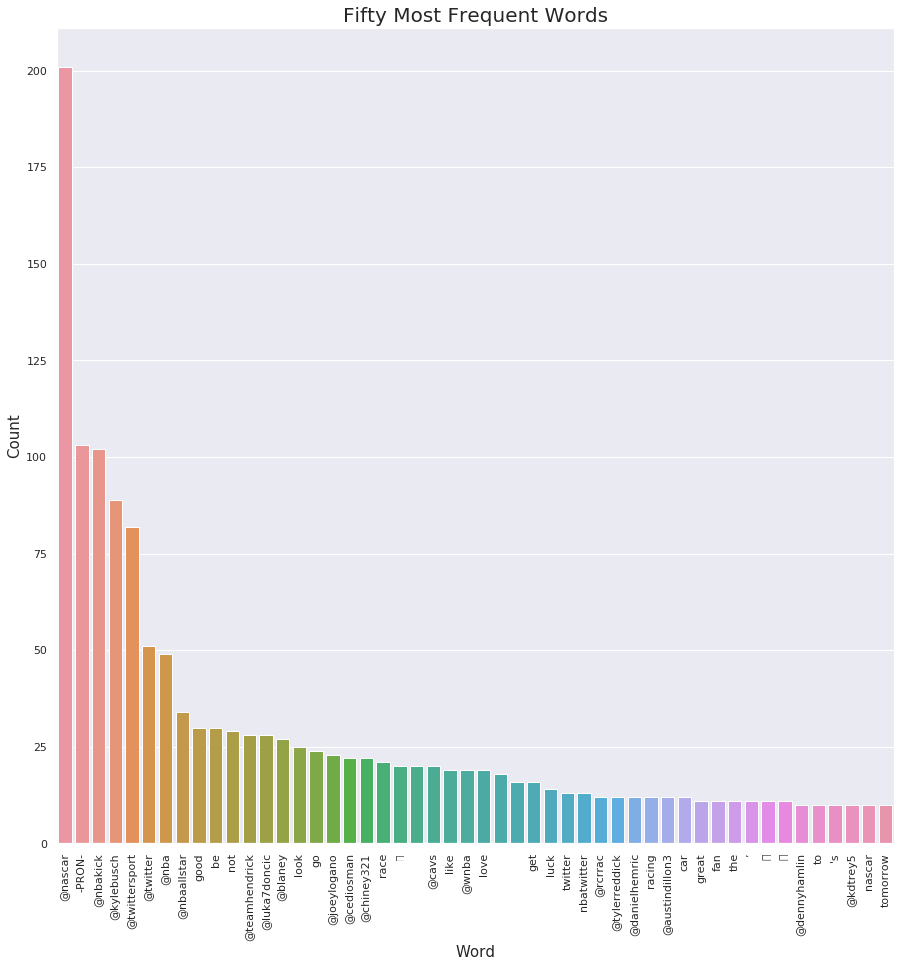

In [35]:
import seaborn as sns

sns.set(style="whitegrid")
sns.set(rc={"figure.figsize": (15,15)})
ax = sns.barplot(x=total_word_counts["word"][:50], y=total_word_counts["count"][:50], data=total_word_counts)
ax.set_xticklabels(total_word_counts["word"][:50], rotation=90)
ax.set_title("Fifty Most Frequent Words", size=20)
ax.set_ylabel("Count", size=15)
ax.set_xlabel("Word", size=15)

#### Aggregate BOW data by tweet

In [36]:
len(word_counts["To_Tweet_ID"].unique())

47

Next up: 
+ figure out how to do a search in twitter API for most viewed and least viewed tweets from certain users (so we can run it tonight)

In [59]:
aggregated_word_counts = pd.DataFrame(columns=common_frequent_words)

for i, ID in enumerate(word_counts["To_Tweet_ID"].unique()):
    indices = list(np.where(word_counts["To_Tweet_ID"] == ID)[0])
    sums = word_counts.iloc[indices].sum()
    aggregated_word_counts.loc[i] = sums

aggregated_word_counts["To_Tweet_ID"] = word_counts["To_Tweet_ID"].unique()

In [60]:
aggregated_word_counts.shape

(47, 660)

### TF-IDF Approach

In [154]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer
vect_tweet_replies = vectorizer.fit_transform(repliesdf["Reply"])
print("Number of features: %d" % vect_tweet_replies.get_shape()[1])

Number of features: 268


In [155]:
vect_tweet_replies_csr = vect_tweet_replies.tocsr()

n = vect_tweet_replies_csr.shape[0]

tfidf_bypara = [{} for _ in range(0,n)]

terms = vectorizer.get_feature_names()

for i, j in zip(*vect_tweet_replies_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = vect_tweet_replies_csr[i, j]

In [156]:
word_vectors = pd.DataFrame(tfidf_bypara)

word_vectors.head()

,18,24,48,500,7pm,_ajawilson22,af,allyracing,american,amp,...,worst,wow,wreck,wrecks,xfinity,yeah,year,years,youuuuuuu,yuck
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,0.549464,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
word_vectors.sum(axis=0)

18                0.873520
24                0.800669
48                2.187343
500               3.262057
7pm               1.072978
_ajawilson22      3.887328
af                0.928757
allyracing        2.272864
american          1.016310
amp               1.893287
antdavis23        1.845322
anybody           0.783636
atlanta           1.220429
atlhawks          5.888144
austin            1.897109
austindillon3     4.708942
awesome           3.426933
awful             1.497205
babe              1.212828
baby              1.440404
bad               3.214723
bar               0.749443
basketball        1.392096
beautiful         1.464906
bensimmons25      5.441419
best              3.341847
better            4.155610
big               1.653770
blaney           11.868083
bless             0.775596
                   ...    
turd              2.115352
twitter          30.533473
twittersports    38.447143
tylerreddick      4.708942
ugly              1.630946
ve                2.408780
v

In [158]:
word_vectors.shape

(471, 268)

In [159]:
word_vectors["Reply"] = repliesdf["Reply"]
word_vectors.shape

(471, 269)

### tweepy Cursor searches

In [ ]:
replies=[] 
#get list of all tweet ids from user. 
#get all reply tweets and match tweets to the tweet id they were replied to
# check on timeout and items and the fact that his name is IN the tweet

for full_tweets in tweepy.Cursor(api.user_timeline, screen_name='camjordan94',timeout=999999).items(13):
    for tweet in tweepy.Cursor(api.search,q='@camjordan94', since_id=tweet_id, timeout=999999).items(1000):
        if hasattr(tweet, 'in_reply_to_status_id_str'):
            if (tweet.in_reply_to_status_id_str==full_tweets.id_str):
                replies.append(tweet.text)
                print("Tweet :",full_tweets.text)
    for r in replies:
        print("Replies :",r)
    replies = []

In [ ]:
len(replies)

In [ ]:
replies[7]

In [ ]:
type(full_tweets)

In [ ]:
full_tweets.text

In [ ]:
df_replies = pd.DataFrame(replies)

In [ ]:
df_replies.head()

In [ ]:
full_tweets[0]

In [ ]:
len(full_tweets)

In [ ]:
tweepy.Cursor(api.user_timeline, screen_name='camjordan94',timeout=999999)

In [ ]:
user_timeline = []

for full_tweet in tweepy.Cursor(api.user_timeline, screen_name='camjordan94',timeout=999999).items(13):
    user_timeline.append((full_tweet.text, full_tweet.id_str))


In [ ]:
len(user_timeline)

In [ ]:
user_timeline[5][1]

In [ ]:
#gold
replies = []

for tweet in tweepy.Cursor(api.search, q="to:NASCAR", since_id="1097148715121459200", max_id="1097200000000000000", timeout=999999).items(2000):
    if tweet.in_reply_to_status_id_str == "1097148715121459200":
        replies.append((tweet.text, tweet.in_reply_to_status_id_str))
       # print("Tweet :",full_tweets.text)
        #for r in replies:
         #   print("Replies :",r)
        #replies = []

In [ ]:
len(replies)

In [ ]:
replies[0]

In [ ]:
print(replies[0][1])

In [ ]:
replies=[] 
#get list of all tweet ids from user. 
#get all reply tweets and match tweets to the tweet id they were replied to
# check on timeout and items and the fact that his name is IN the tweet

user_timeline = ["gold", "black", "jacket", "backdrop", "cam", "saints", "whodat", "wake up", "woke up", "retire"] 
searched_tweets = ["gold", "overalls", "wake up", "black", "whodat", "black"]

for full_tweets in user_timeline:
    #
    if (full_tweets == "gold") or (full_tweets == "black") or (full_tweets == "jacket"):
        for tweet in searched_tweets:
            if (tweet == full_tweets):
                replies.append(tweet)
        print("Tweet :",full_tweets)
        for r in replies:
            print("Replies :",r)
        replies = []

tweepy to dataframe: https://stackoverflow.com/questions/47925828/how-to-create-a-pandas-dataframe-using-tweepy

### credentialing for premium API

In [ ]:
from searchtweets import ResultStream, gen_rule_payload, load_credentials

In [ ]:
premium_search_args = load_credentials(filename="twitter_keys",
                                      env_overwrite=False)

### premium API

In [ ]:
rule = gen_rule_payload("to:camjordan94", from_date="2019-02-02", to_date="2019-02-05")
print(rule)

In [ ]:
rule = gen_rule_payload(in_reply_to_screen_name="camjordan94", from_date="2019-02-02", to_date="2019-02-04", results_per_call=100)
print(rule)

In [ ]:
from searchtweets import collect_results


In [ ]:
tweets = collect_results(rule,
                         max_results=100,
                         result_stream_args=premium_search_args) # change this if you need to


In [ ]:
[print(tweet.all_text, end='\n\n') for tweet in tweets[0:140]];
